# Chapter 1 

## Exercise 1

This simple data analysis pipeline uses a [decision tree](https://en.wikipedia.org/wiki/Decision_tree_learning) model to classify flowers from the famous [iris dataset](https://archive.ics.uci.edu/ml/datasets/iris).

Questions:

1. Look through the example pipeline. Mark which cells belong to which categories in this categorization:
    - Data preparation and loading
    - Modeling
    - Evaluation
    - Presentation
2. Try to determine the pieces of the code that are **unique** to this specific dataset. Discuss how you would generalize this pipeline to other datasets.

## Solutions for exercise 1

1. - Data preparation and loading: Cells 1, 2, 3 and 4
   - Modeling: Cells 1 and 5
   - Evaluation: Cells 1, 6 and 7
   - Presentation: Cells 1, 5 and 8
2. The naming of the variables throughout the dataset is unique to `iris`-dataset, but it would be possible to change these to generic names.

   Likewise the target feature and plotted features could be generalized to take these from variables. Thus the only unique part is the cell where the data is loaded: Cell 2 

## Solutions in detail

This cell contains something from all categories:
- [tidyverse](https://www.tidyverse.org/) is used throughout the pipeline as it provides the `tibble`-structure, functions to manipulate it and various other libraries.
- [modelr](https://modelr.tidyverse.org/) is required for [resample_partition](https://modelr.tidyverse.org/reference/resample_partition.html), so in this case it is related to data loading.
- [rpart](https://cran.r-project.org/web/packages/rpart/rpart.pdf) is required for the function [rpart](https://www.rdocumentation.org/packages/rpart/versions/4.1-15/topics/rpart), which creates decision trees, so it is related to modeling.
- [caret](https://topepo.github.io/caret/) is required for the [confusionMatrix](https://www.rdocumentation.org/packages/caret/versions/6.0-86/topics/confusionMatrix)-function, so it is related to evaluation.
- [stringr](https://stringr.tidyverse.org/) is used in the presentation part to improve plot labels via [str_to_title](https://stringr.tidyverse.org/reference/case.html).

In [1]:
# Cell 1
library(tidyverse)
library(modelr)
library(rpart)
library(caret)
library(stringr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



This cell is completely dedicated to data loading. Iris dataset is loaded and `Species`-field is converted into a categorical variable. Index will be stored as a variable to verify that sampling worked (more on this later).

In [2]:
# Cell 2
iris <- read_csv('../data/iris.data', col_names=c('Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species')) %>%
    rowid_to_column('id') %>%
    mutate(Species=str_remove(Species, 'Iris-')) %>%
    mutate(Species=as.factor(Species))
print(iris)

Parsed with column specification:
cols(
  Sepal.Length = col_double(),
  Sepal.Width = col_double(),
  Petal.Length = col_double(),
  Petal.Width = col_double(),
  Species = col_character()
)


# A tibble: 150 x 6
      id Sepal.Length Sepal.Width Petal.Length Petal.Width Species
   <int>        <dbl>       <dbl>        <dbl>       <dbl> <fct>  
 1     1          5.1         3.5          1.4         0.2 setosa 
 2     2          4.9         3            1.4         0.2 setosa 
 3     3          4.7         3.2          1.3         0.2 setosa 
 4     4          4.6         3.1          1.5         0.2 setosa 
 5     5          5           3.6          1.4         0.2 setosa 
 6     6          5.4         3.9          1.7         0.4 setosa 
 7     7          4.6         3.4          1.4         0.3 setosa 
 8     8          5           3.4          1.5         0.2 setosa 
 9     9          4.4         2.9          1.4         0.2 setosa 
10    10          4.9         3.1          1.5         0.1 setosa 
# … with 140 more rows


This cell is again related to data preparation. The rows in the iris dataset are shuffled with the sample function. This is verified by seeing that the new index differs from the old index. Old index is removed as it would ruin the learning process (decision tree would learn to use the index).

This step is unnecessary in the grand scheme of things as the [resample_partition](https://modelr.tidyverse.org/reference/resample_partition.html)-function picks rows randomly. It does not shuffle them, but it does not matter for rpart. However, it highlights how row shuffling would be accomplished and is a useful step to minimize risk of learning by index.

Random number generator seed in initialized manually to enable reproducibility.

In [3]:
# Cell 3
set.seed(42)
sample_ix <- sample(nrow(iris))
iris <- iris[sample_ix,]
head(iris)
iris <- select(iris, -id)
head(iris)

id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
49,5.3,3.7,1.5,0.2,setosa
65,5.6,2.9,3.6,1.3,versicolor
74,6.1,2.8,4.7,1.2,versicolor
146,6.7,3.0,5.2,2.3,virginica
122,5.6,2.8,4.9,2.0,virginica
150,5.9,3.0,5.1,1.8,virginica


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.3,3.7,1.5,0.2,setosa
5.6,2.9,3.6,1.3,versicolor
6.1,2.8,4.7,1.2,versicolor
6.7,3.0,5.2,2.3,virginica
5.6,2.8,4.9,2.0,virginica
5.9,3.0,5.1,1.8,virginica


This step is still data preparation, but it is very close to the modeling part. The dataset is split into training and test sets with 4 to 1 ratio.

Number of different species in train and test splits are counted to verify that the both splits have similar species proportions.

In [4]:
# Cell 4
iris_split <- iris %>%
    resample_partition(c(train=0.8, test=0.2))

iris_split$train %>%
    as_tibble() %>%
    group_by(Species) %>%
    tally()

iris_split$test %>%
    as_tibble() %>%
    group_by(Species) %>%
    tally()

Species,n
setosa,38
versicolor,40
virginica,41


Species,n
setosa,12
versicolor,10
virginica,9


This cell is the modeling part. A decision tree model is fitted into the training data.

The printing of the fitted model is more related to presentation than modeling, but one could also consider it part of the modeling process.

In [5]:
# Cell 5
fitted_tree <- iris_split$train %>%
    as_tibble() %>%
    rpart(Species ~ ., data=., method='class')
fitted_tree

n= 119 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 119 78 virginica (0.31932773 0.33613445 0.34453782)  
  2) Petal.Length< 2.45 38  0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.45 81 40 virginica (0.00000000 0.49382716 0.50617284)  
    6) Petal.Width< 1.75 43  4 versicolor (0.00000000 0.90697674 0.09302326) *
    7) Petal.Width>=1.75 38  1 virginica (0.00000000 0.02631579 0.97368421) *

This cell is related to the evaluation process.

Predictions are made based on test split and the successful predictions are recorded for future use. 

In [6]:
# Cell 6
iris_precicted <- iris_split$test %>%
    as_tibble() %>%
    mutate(PredictedSpecies = predict(fitted_tree, newdata=., type='class')) %>%
    mutate(Prediction=ifelse(Species == PredictedSpecies, str_to_title(as.character(Species)), 'Classification failure'))

This cell is also related to the evaluation process.

There are various metrics that can be used to evaluate model success. Here we are checking [the confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix) and [the accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision#In_binary_classification) of our decision tree model.

The function [confusionMatrix](https://www.rdocumentation.org/packages/caret/versions/6.0-86/topics/confusionMatrix) provides these quantities along with other metrics. 

In [7]:
# Cell 7
confusionMatrix(iris_precicted$Species, iris_precicted$PredictedSpecies)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         12          0         0
  versicolor      0         10         0
  virginica       0          1         8

Overall Statistics
                                         
               Accuracy : 0.9677         
                 95% CI : (0.833, 0.9992)
    No Information Rate : 0.3871         
    P-Value [Acc > NIR] : 8.358e-12      
                                         
                  Kappa : 0.9512         
                                         
 Mcnemar's Test P-Value : NA             

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.9091           1.0000
Specificity                 1.0000            1.0000           0.9565
Pos Pred Value              1.0000            1.0000           0.8889
Neg Pred Value              1.0000            0.9524           1.0000
Prevalence

This cell does plots of the data so it is related to the presentation process.

Here we create scatter plots of the `Petal`- and `Sepal`-dimensions along with the predicted species. Failures are plotted separately so that we can see why our classifier might have failed: the failures are situated along boundaries of Virginica and Versicolor.

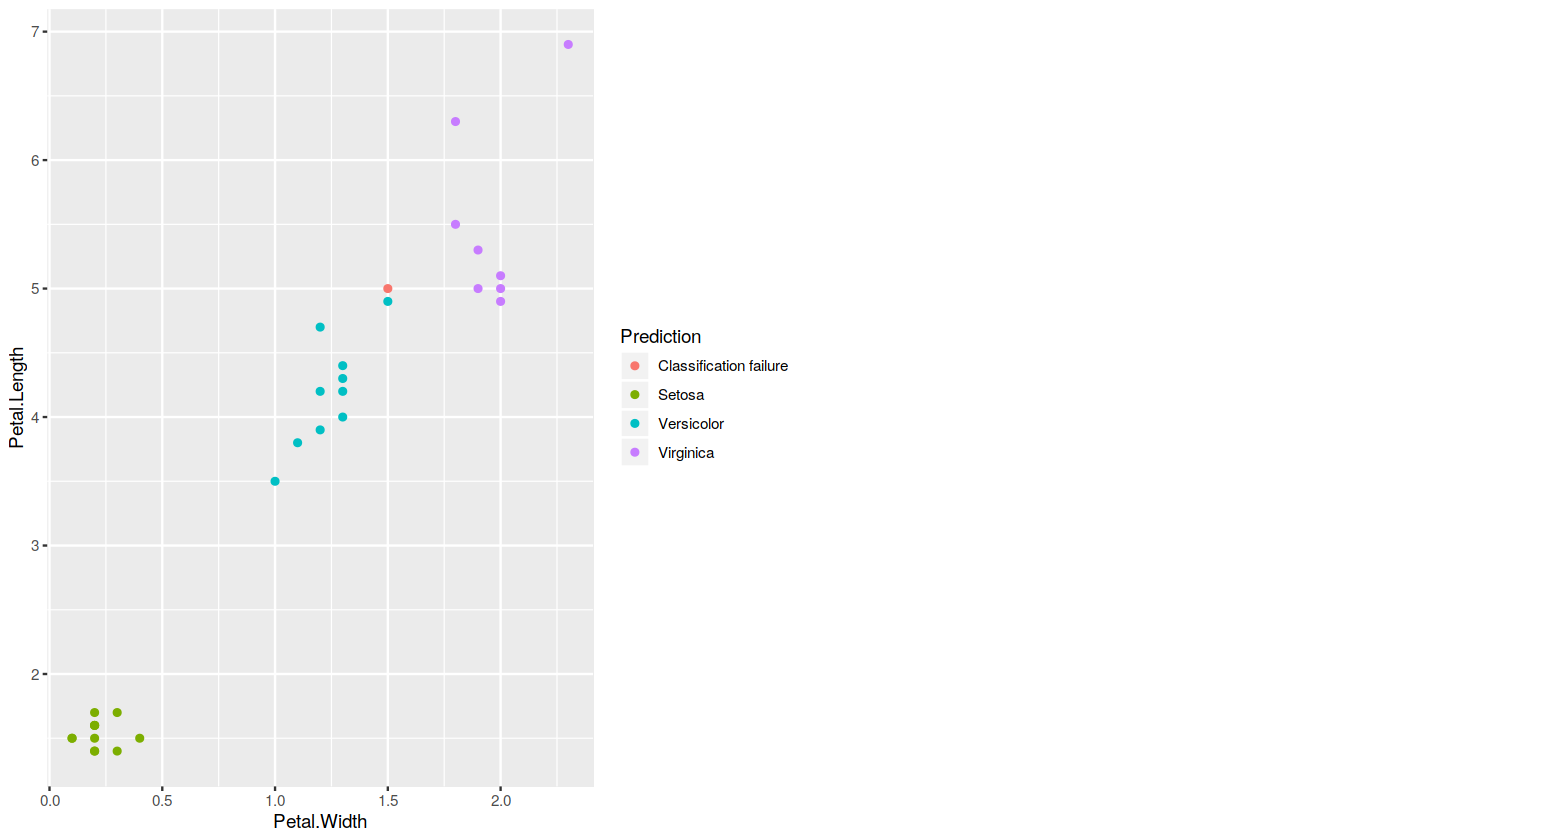

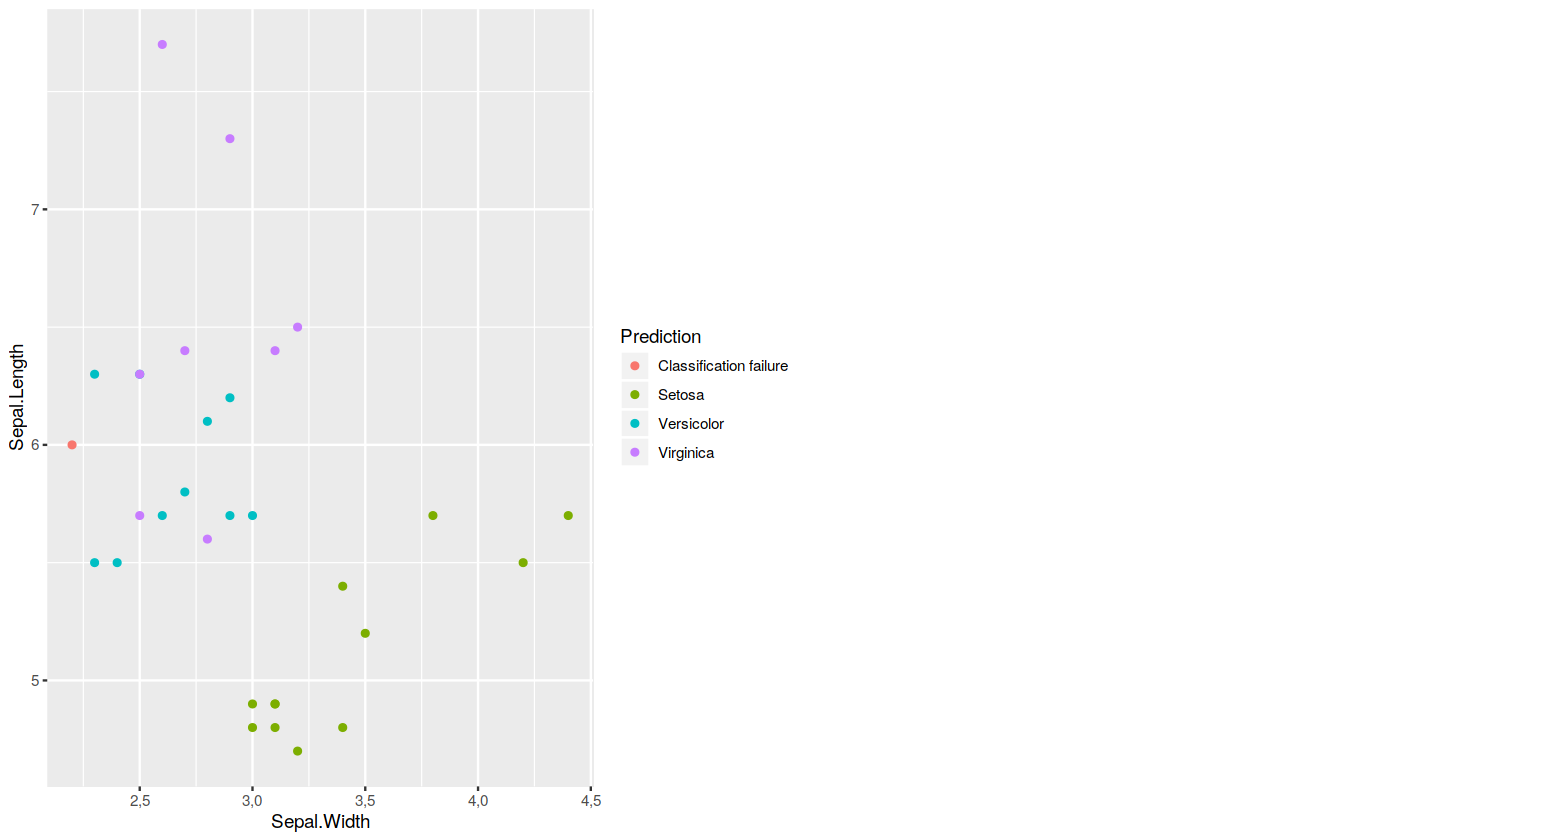

In [8]:
# Cell 8
options(repr.plot.width=13, repr.plot.height=7)
ggplot(data=iris_precicted, aes(x=Petal.Width, y=Petal.Length, color=Prediction)) +
    geom_point()

ggplot(data=iris_precicted, aes(x=Sepal.Width, y=Sepal.Length, color=Prediction)) +
    geom_point()